# Cars Dataset

### The dataset scraped from AutoScout24 and contains info about cars like model, mileage, horse power, etc

In [1119]:
# useful libraries for the project 
import pandas as pd
import numpy as np
import math
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import statistics as stat
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
import datetime
from sklearn.model_selection import train_test_split

In [1120]:
# reading the file 'autoscout24-germany-dataset' into a pandas DataFrame and finding the first 5 rows with head.
df = pd.read_csv('autoscout24-germany-dataset.csv', sep=',')
df.head(5)

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [1121]:
# getting a sample of the observations
df_sample = df.sample(10)
df_sample

,mileage,make,model,fuel,gear,offerType,price,hp,year
36987,143730,Audi,A4,Diesel,Automatic,Used,15990,177.0,2013
1146,88730,BMW,520,Diesel,Automatic,Used,23860,190.0,2017
40809,12500,Citroen,C-Elysée,Gasoline,Manual,Used,8900,82.0,2017
44812,6447,Citroen,C3,Gasoline,Manual,Used,12495,83.0,2020
3844,95000,Dacia,Duster,Gasoline,Manual,Used,5800,105.0,2013
38453,39000,Renault,Twingo,Gasoline,Manual,Used,5890,71.0,2015
22608,16196,Renault,Clio,Gasoline,Manual,Used,14200,101.0,2020
10508,10,Fiat,500,Gasoline,Manual,Pre-registered,12400,69.0,2021
8494,16800,Kia,Carens,Gasoline,Manual,Used,11350,135.0,2013
22550,49714,Opel,Mokka,Gasoline,Manual,Used,14850,140.0,2017


### understanding better our data

In [1122]:
# finding dataframe's shape 
df.shape
# the dataframe has 46405 rows and 9 columns

(46405, 9)

In [1123]:
# displaying the tail of the dataframe (the last 5 rows)
display(df.tail(5))

,mileage,make,model,fuel,gear,offerType,price,hp,year
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46404,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


In [1124]:
# information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [1125]:
# getting the columns to a list
list(df.columns)

['mileage',
 'make',
 'model',
 'fuel',
 'gear',
 'offerType',
 'price',
 'hp',
 'year']

In [1126]:
# checking the datatypes of the columns
df.dtypes 
# or in a list
# list(zip(df.columns,df.dtypes))

mileage        int64
make          object
model         object
fuel          object
gear          object
offerType     object
price          int64
hp           float64
year           int64
dtype: object

In [1127]:
# Checking for the number of unique features in each column
df.nunique()


mileage      20117
make            77
model          841
fuel            11
gear             3
offerType        5
price         6668
hp             328
year            11
dtype: int64

### working with column names

In [1128]:
# Standardizing header-column names in the dataframe by using only lowercase letters and by replacing the spaces with underscores
# the columns are almost standardized
df.columns = [df.columns[i].lower().replace(' ', '_') for i in range(len(df.columns))]

# renaming the column offerType to offer_type, fuel to fuel_type, gear to gearbox
df = df.rename(columns={'offertype':'offer_type',
                       'fuel':'fuel_type',
                       'gear':'gearbox'})
list(df.columns)

['mileage',
 'make',
 'model',
 'fuel_type',
 'gearbox',
 'offer_type',
 'price',
 'hp',
 'year']

<!-- ### explanations of the columns
### mileage: how many kilometers the car has traveled?
### make: the make of the car, for example BMW, VW, Toyota
### model: the exact model of the car, for example Yaris (from Toyota Yaris)
### fuel_type: the type of fuel, for example Electric, Gasoline, Diesel
### gearbox: the type of gearbox, automatic, manual
### offer_type: the method of the offer, for example used, pre-registered
### price: the price of the car
### hp: horse power of the car
### year: the year of the car's first registration -->

<!-- # explanation of the columns
# mileage',
#  'make',
#  'model',
#  'fuel_type',
#  'gearbox',
#  'offer_type',
#  'price',
#  'hp',
#  'year' -->

## Expanation of the columns
#### mileage: how many kilometers the car has traveled
#### make: the make of the car, for example BMW, VW, Toyota
#### model: the model of the car, for example yaris (from Toyota yaris)
#### fuel_type: the type of fuel, for example electric, gasoline, diesel
#### gearbox: the type of the gearbox, manual, automatic or semi-automatic
#### offer_type: the tyoe of the offer, for example used, pre-registered
#### price: the price of the car
#### hp: the horse power of the car
#### year: the year of the cars first registration

In [1129]:
# creating a new column which has the age of every observation right now
df['age'] = datetime.datetime.now().year - df['year']
df.head(5)

,mileage,make,model,fuel_type,gearbox,offer_type,price,hp,year,age
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011,11
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011,11
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011,11
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011,11
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011,11


In [1130]:
# Datetime format to the column year, from int64 we convert it to datetime 64
df['year']=pd.to_datetime(df['year'])
df.dtypes 

mileage                int64
make                  object
model                 object
fuel_type             object
gearbox               object
offer_type            object
price                  int64
hp                   float64
year          datetime64[ns]
age                    int64
dtype: object

### checking and dealing with NaN values

In [1131]:
# checking which columns have NaN values 
df.isna().any()

mileage       False
make          False
model          True
fuel_type     False
gearbox        True
offer_type    False
price         False
hp             True
year          False
age           False
dtype: bool

In [1132]:
# checking how many NaN values are per column
df.isna().sum()
# there are 143 NaN values in model column, 182 NaN values in gearbox column and 29 NaN values in hp column

mileage         0
make            0
model         143
fuel_type       0
gearbox       182
offer_type      0
price           0
hp             29
year            0
age             0
dtype: int64

In [1133]:
# the percentage of null values per column
df_nan_per = pd.DataFrame( round(df.isna().sum()/len(df),4)*100)
df_nan_per
# 0,31% of the observations in column model is NaN values, 0,39% of the observations in column gearbox is NaN values and 
# 0,06% of the observations in column hp is NaN values

,0
mileage,0.00
make,0.00
model,0.31
fuel_type,0.00
gearbox,0.39
offer_type,0.00
price,0.00
hp,0.06
year,0.00
age,0.00


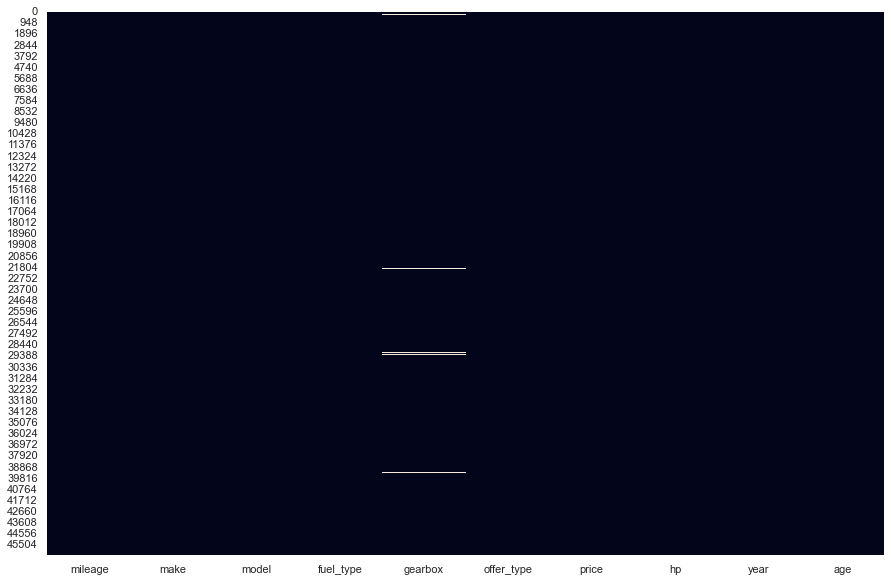

In [1134]:
# getting a heatmap with NaN values
plt.figure(figsize=(15,10))
sns.heatmap(df.isna(),annot=False,cbar=False)
plt.show()

In [1135]:
# for the column gearbox we will add an extra option and we will replace the NaN values with the option unknown
df['gearbox'].fillna('unknown', inplace=True)
# checking the results and there are no NaN values in column gearbox
df.isna().sum()

mileage         0
make            0
model         143
fuel_type       0
gearbox         0
offer_type      0
price           0
hp             29
year            0
age             0
dtype: int64

In [1136]:
# defining as nan_columns the rest of the columns that have NaN values
nan_columns = df.columns[df.isna().any()]
nan_columns

Index(['model', 'hp'], dtype='object')

In [1137]:
# removing the rows that contains NaN values with the dropna() method.
df.dropna(axis=0, inplace=True)
# checking the results and there are no NaN values in the nan_columns 
list(zip(df.columns, df.isna().sum()))

[('mileage', 0),
 ('make', 0),
 ('model', 0),
 ('fuel_type', 0),
 ('gearbox', 0),
 ('offer_type', 0),
 ('price', 0),
 ('hp', 0),
 ('year', 0),
 ('age', 0)]

In [1138]:
# getting the new shape after droping some rows with NaN values
df.shape
# there are 46236 rows instead of 46405 we had in the beginning. There are 169 less rows.

(46236, 10)

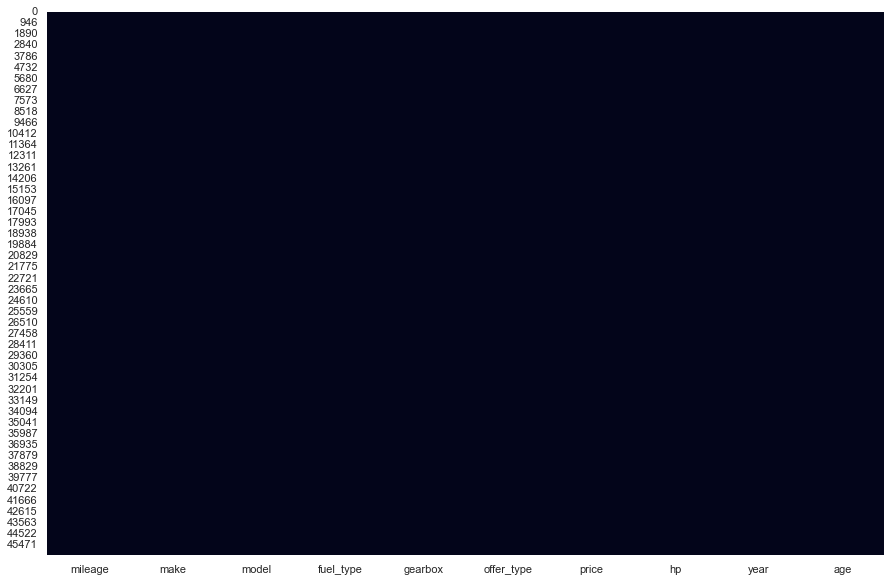

In [1139]:
# getting the new heatmap with NaN values
plt.figure(figsize=(15,10))
sns.heatmap(df.isna(),annot=False,cbar=False)
plt.show()
# there are no NaN values, as we expected

In [1140]:
# removing duplicate registrations and there are 44107 observations instead of 46236
df = df.drop_duplicates(keep='first')
df.shape[0]

44107

In [1141]:
# converting the type of column hp from float to int  
df['hp'] = df['hp'].astype(np.int64)
df['hp'].dtypes 

dtype('int64')

### seperating numerical and categorical columns 

In [1142]:
# checking which columns are numerical
df_num = df._get_numeric_data().columns.values
df_num

array(['mileage', 'price', 'hp', 'age'], dtype=object)

In [1143]:
# getting the numerical columns
df_num = df.select_dtypes(include=['float', 'int'])
df_num.head(3)

,mileage,price,hp,age
0,235000,6800,116,11
1,92800,6877,122,11
2,149300,6900,160,11


In [1144]:
# checking which columns are categorical, in a list
categorical = list(df.select_dtypes(['object']).columns.values)
categorical

['make', 'model', 'fuel_type', 'gearbox', 'offer_type']

In [1145]:
# getting the categorical columns
df_cat = df.select_dtypes(['object'])
df_cat.tail(3)

,make,model,fuel_type,gearbox,offer_type
46397,Fiat,500,Electric/Gasoline,Manual,Demonstration
46398,Fiat,Panda,Electric/Gasoline,Manual,Demonstration
46399,Skoda,Fabia,Gasoline,Manual,Demonstration


## EDA (Exploratory Data Analysis)

In [1146]:
# looking for the values in every column-feature   
for col in df:
    print(df[col].value_counts(), '\n')

10        956
50        295
20        287
5         214
100       207
         ... 
47446       1
29562       1
121134      1
140647      1
837         1
Name: mileage, Length: 20058, dtype: int64 

Volkswagen    6693
Opel          4583
Ford          4274
Skoda         2739
Renault       2692
              ... 
FISKER           1
Brilliance       1
Tazzari          1
Zhidou           1
Alpine           1
Name: make, Length: 73, dtype: int64 

Golf                         1453
Corsa                        1395
Fiesta                       1235
Astra                        1142
Focus                         948
                             ... 
Gallardo                        1
S60 Cross Country               1
John Cooper Works Clubman       1
323                             1
NV250                           1
Name: model, Length: 840, dtype: int64 

Gasoline             27307
Diesel               14725
Electric/Gasoline     1043
Electric               693
CNG                    113
LPG

In [1147]:
# describing the dataframe for numerical features
df.describe()

,mileage,price,hp,age
count,4.410700e+04,4.410700e+04,44107.000000,44107.000000
mean,7.232136e+04,1.652929e+04,133.514431,6.070170
std,6.218891e+04,1.942342e+04,75.012750,3.119355
min,0.000000e+00,1.100000e+03,1.000000,1.000000
25%,2.150000e+04,7.490000e+03,86.000000,3.000000
50%,6.126000e+04,1.099000e+04,116.000000,6.000000
75%,1.060000e+05,1.949000e+04,150.000000,9.000000
max,1.111111e+06,1.199900e+06,850.000000,11.000000


In [1148]:
# describing the dataframe for categorical features
df.describe(include=["bool","object"])

,make,model,fuel_type,gearbox,offer_type
count,44107,44107,44107,44107,44107
unique,73,840,11,4,5
top,Volkswagen,Golf,Gasoline,Manual,Used
freq,6693,1453,27307,28752,38705


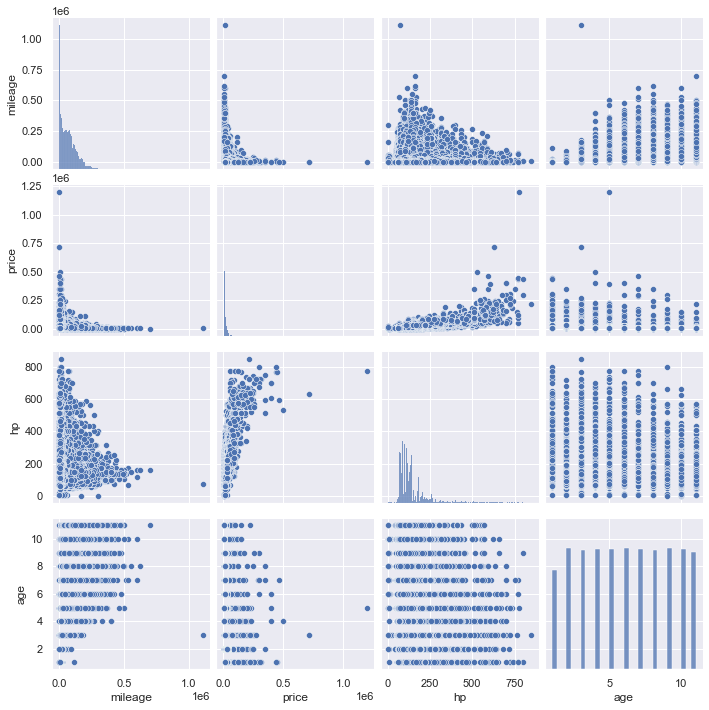

In [1149]:
# different plots per numerical pairs
sns.pairplot(df_num)

(array([3994., 4083., 4115., 4037., 4073., 4105., 4087., 4088., 4044.,
        7481.]),
 array([2.32754630e-11, 2.32870370e-11, 2.32986111e-11, 2.33101852e-11,
        2.33217593e-11, 2.33333333e-11, 2.33449074e-11, 2.33564815e-11,
        2.33680556e-11, 2.33796296e-11, 2.33912037e-11]),
 <BarContainer object of 10 artists>)

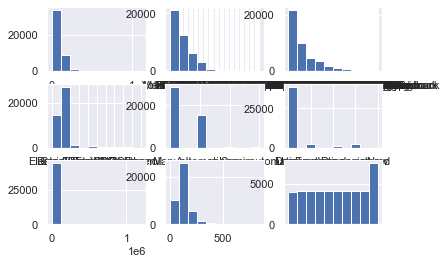

In [1150]:
# getting multiple plots in the same space to find interesting plots and useful insights,
# we can choose the interesting plots and then replot them
fig, axs = plt.subplots(3, 3) 

axs[0, 0].hist(df['mileage'])
axs[0, 1].hist(df['make'])
axs[0, 2].hist(df['model'])
axs[1, 0].hist(df['fuel_type'])
axs[1, 1].hist(df['gearbox'])
axs[1, 2].hist(df['offer_type'])
axs[2, 0].hist(df['price'])
axs[2, 1].hist(df['hp'])
axs[2, 2].hist(df['year'])

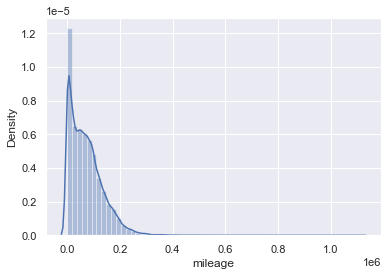

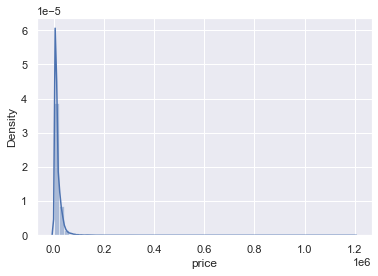

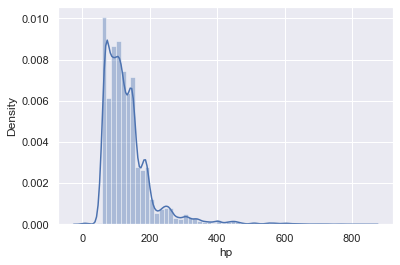

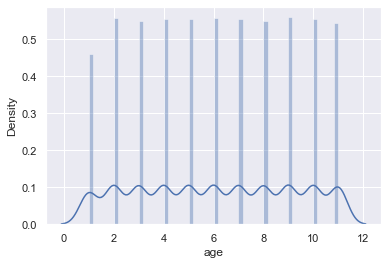

In [1151]:
# distribution plots of the numerical variables
for col in df_num:
    sns.distplot(df_num[col], bins=60)
    plt.show()
# some of the distributions are skewed, needed to normalize them

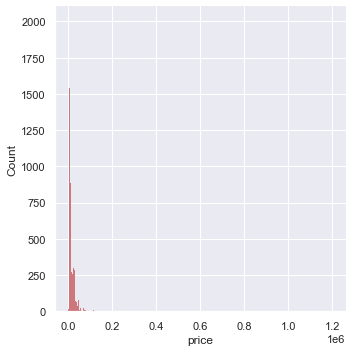

In [1152]:
# getting the distribution plot from the most interesting feature (which will be the target)
sns.displot(data=df, x="price", color='r', binwidth=400)
sns.set(rc = {'figure.figsize':(20,10)})
plt.show()
# seems that there are some big outliers which will be more clear when the boxplots will be plotted

In [1153]:
# creating a new dataframe from the existing daraframe with specific columns in order to use them for scatterplotting
scat_cols= df[['mileage','fuel_type', 'gearbox', 'offer_type', 'hp', 'year', 'age', 'price']]
scat_cols.tail(5)

,mileage,fuel_type,gearbox,offer_type,hp,year,age,price
46394,10,Gasoline,Manual,Pre-registered,72,1970-01-01 00:00:00.000002021,1,12340
46396,99,Electric/Gasoline,Manual,Pre-registered,71,1970-01-01 00:00:00.000002021,1,12490
46397,550,Electric/Gasoline,Manual,Demonstration,69,1970-01-01 00:00:00.000002021,1,12805
46398,837,Electric/Gasoline,Manual,Demonstration,69,1970-01-01 00:00:00.000002021,1,12805
46399,1500,Gasoline,Manual,Demonstration,60,1970-01-01 00:00:00.000002021,1,12980


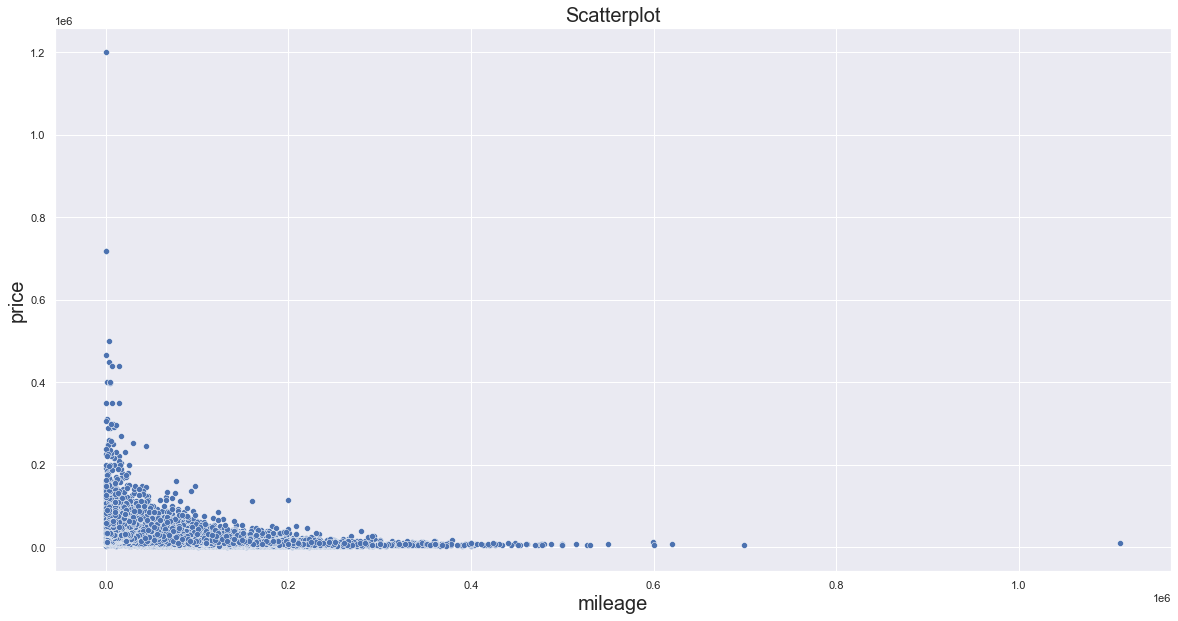

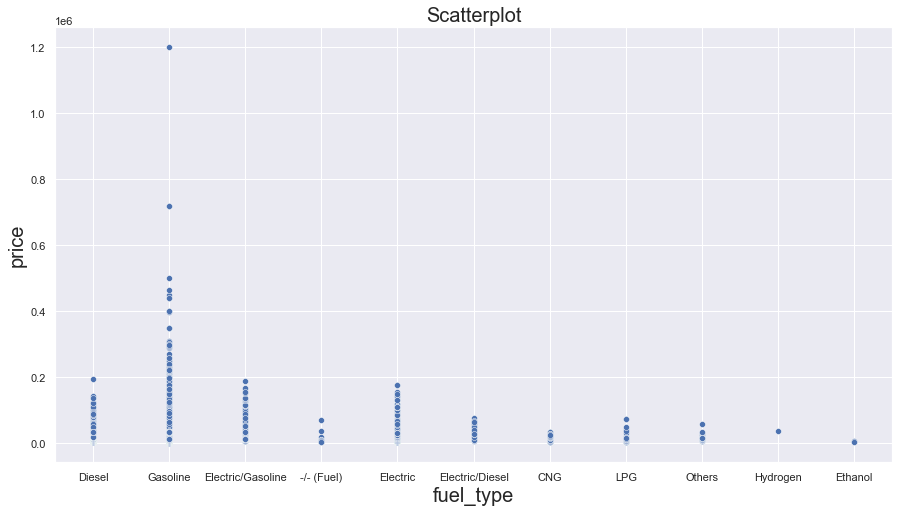

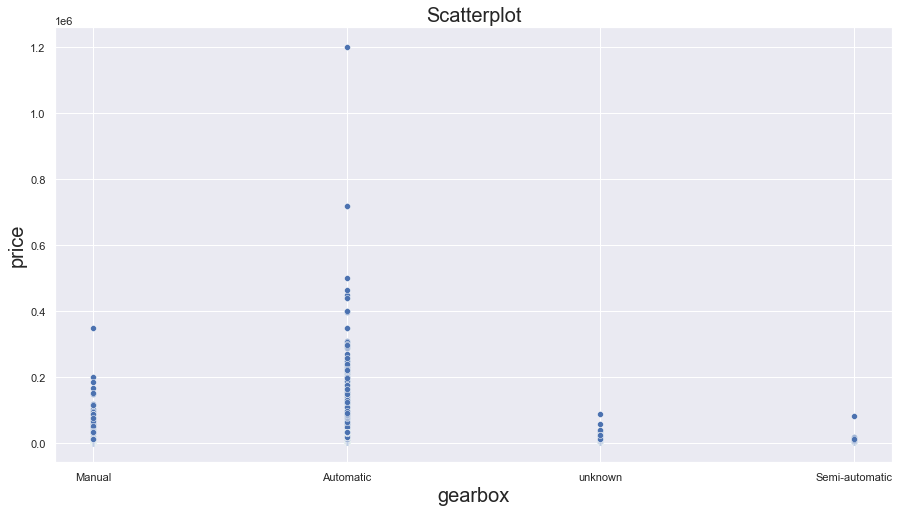

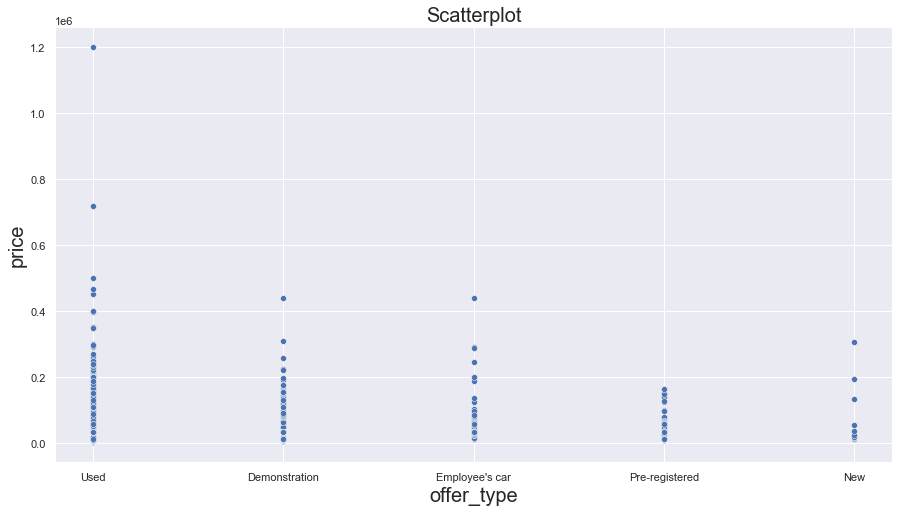

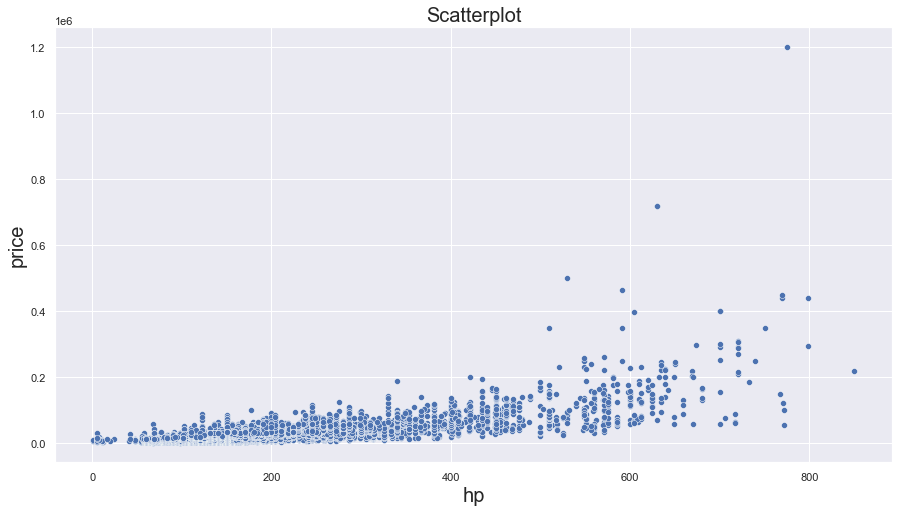

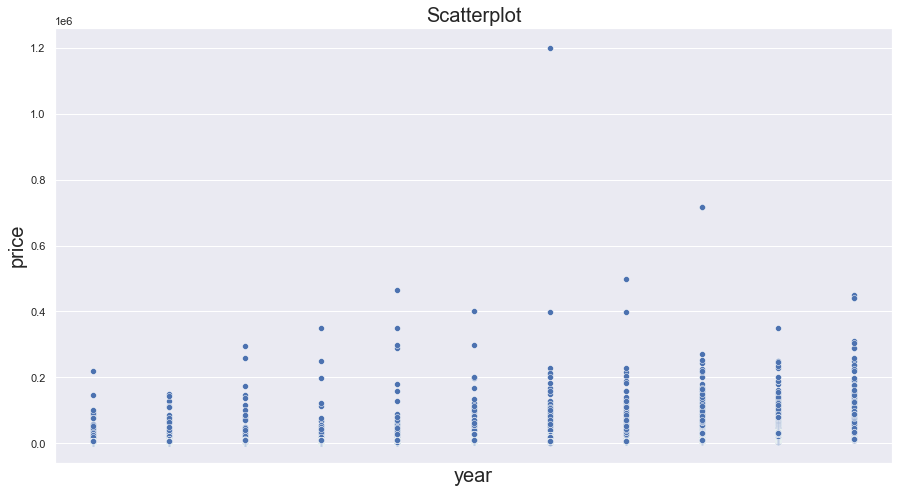

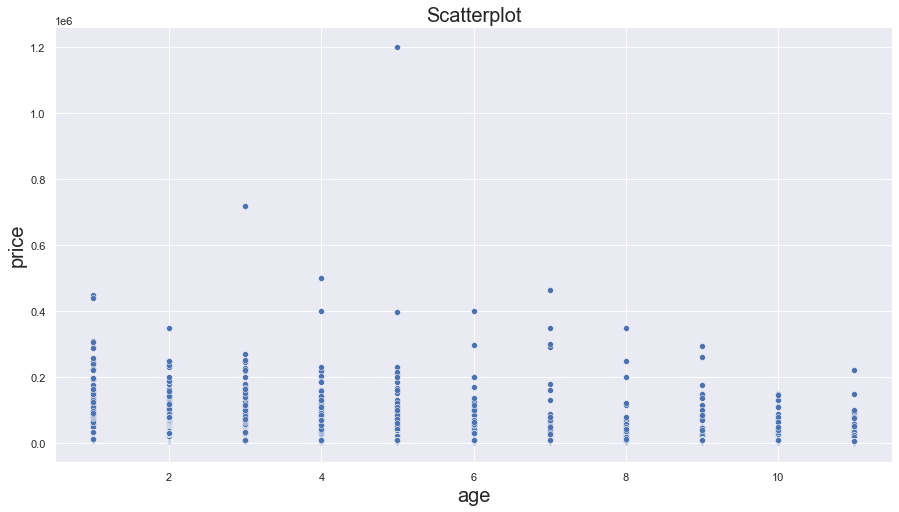

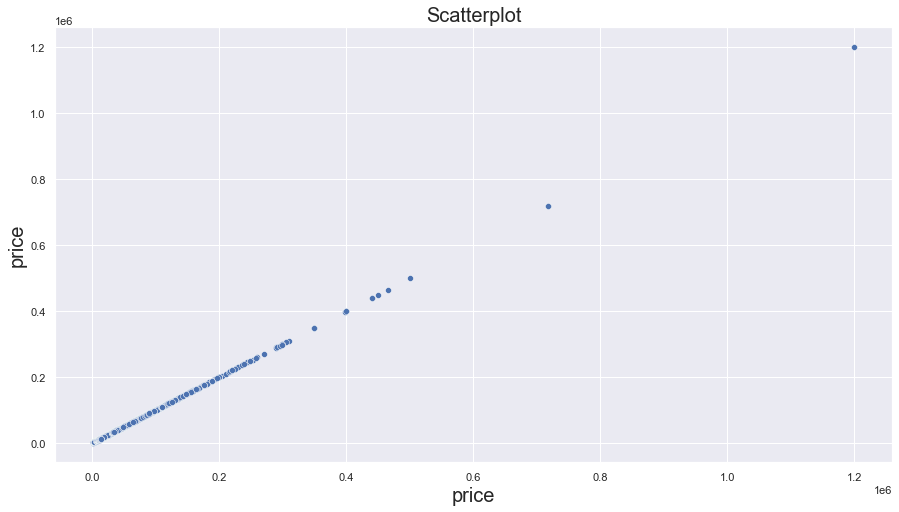

In [1154]:
# scatterplotting
for col in scat_cols:
    p = sns.scatterplot(x=scat_cols[col], y=scat_cols['price'])
    p.set_ylabel("price", fontsize = 20)
    p.set_xlabel(col, fontsize = 20)
    p.set_title("Scatterplot", fontsize = 20)
    sns.set(rc = {'figure.figsize':(15,8)})
    plt.show()

In [1155]:
# some insights of the scatterplots:
# In this case the scatterplots give us better insights for the numerical features

# mileage-price -> mileage is numerical feature, seems like Inverse Exponential function, 
# the lower the mileage is ,then the price becomes higher

# fuel_type-price -> fuel_type is categorical feature, the majority of the cars have as fuel type gasoline, diesel and electric/gasoline
# there are not clear insights for the realationship fuel_type-price with the scatterplot

# gearbox-price-> gearbox is categorical feature, the majority of the cars have as gearbox manual and automatic.
# we could notice that cars with manual gearbox tend to be more expensive 


# offer_type-price -> offer_type is categorical feature, the majority of the cars have as offer type used.
# There are not clear insights for the realationship offer_type-price with the scatterplot

# hp-price -> hp is numerical feature, seems like light expontential to light linear function.
# cars with higher HP tend to be more expensive

# year-price -> year is numerical feature, seems like proportional amounts.
# the higher the year is, then the price becomes higher

# age-price -> age is numerical feature, seems like inversely proportional amounts.
# the higher the age is, then the price becomes lower

# price-price -> price is numerical feature, is the perfect linear regression as we have the same features in the labels

Text(0.5, 0, 'price')

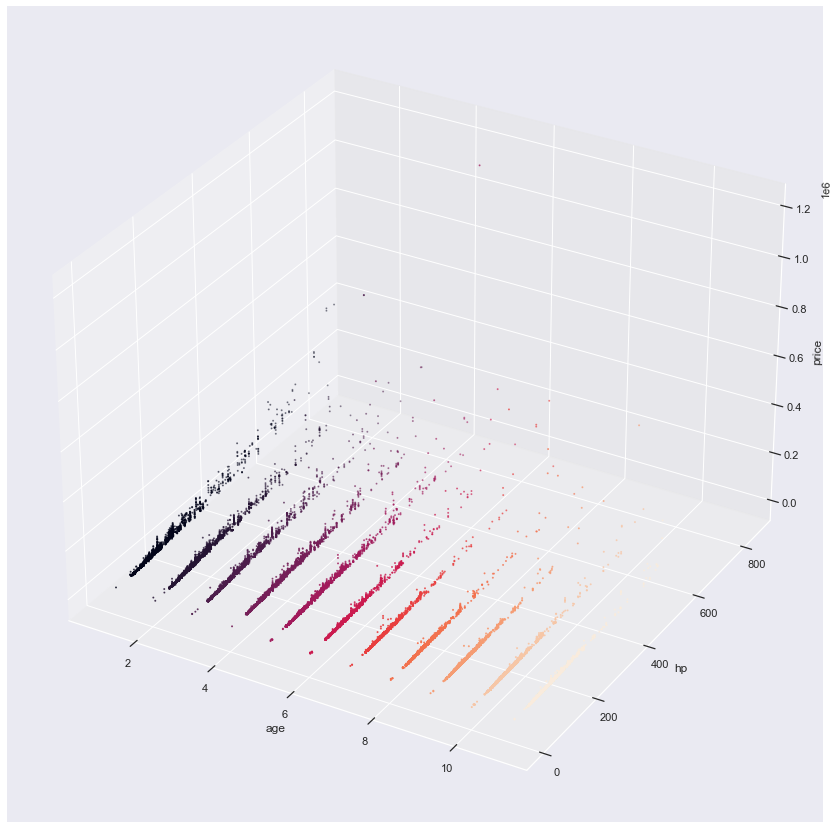

In [1156]:
# plotting 3D plot for hp, age and price
fig = plt.figure(figsize=(20,15))
ax = plt.axes(projection='3d')

hp = df['hp']
age = df['age']
price = df['price']

ax.scatter3D(age, hp, price, c=df['age'], s=1)
ax.set_xlabel('age')
ax.set_ylabel('hp')
ax.set_zlabel('price')

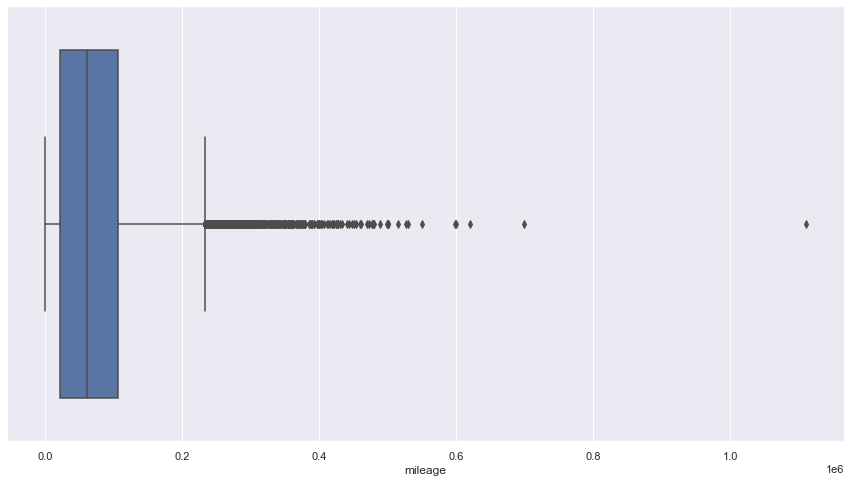

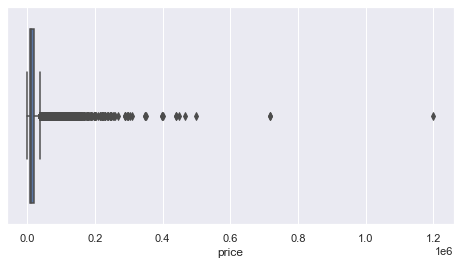

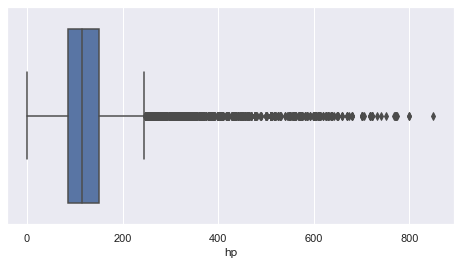

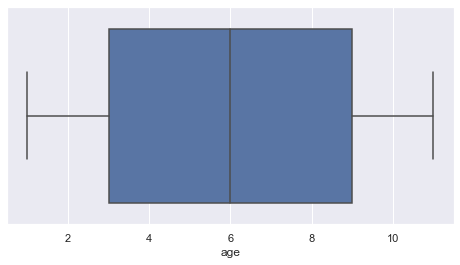

In [1157]:
# checking the outliers in the numerical variables with boxplots, so
for col in df_num:
    sns.boxplot(df_num[col])
    sns.set(rc = {'figure.figsize':(8,4)})
    plt.show()

In [1158]:
# We can notice a lot of outliers in the numerical features

### Creating scenarios

#### playing with the data - finding cheap opportunities

In [1159]:
# finding the top 10 mileaged cars
top10_mileage = df[['mileage','make','model','fuel_type','gearbox','offer_type','price','hp','age']].nlargest(10, ['mileage']).set_index('age')
top10_mileage
# most of the top 10 mileaged cars are Mercedes-Benz (5/10) and their fuel type is Diesel

,mileage,make,model,fuel_type,gearbox,offer_type,price,hp
age,,,,,,,,
3,1111111,Opel,Karl,Gasoline,Manual,Demonstration,10490,73
11,699000,Mercedes-Benz,Sprinter,Diesel,Manual,Used,3990,163
8,620000,Mercedes-Benz,Vito,Diesel,Manual,Used,6500,163
10,599900,Ford,Transit,Diesel,Manual,Used,5990,116
7,598744,Mercedes-Benz,Sprinter,Diesel,Manual,Used,13078,163
8,550000,Iveco,Daily,Diesel,Manual,Used,8000,145
7,530003,Citroen,C3,Gasoline,Manual,Used,5500,68
10,527205,Mercedes-Benz,C 220,Diesel,Automatic,Used,4899,170
7,514614,Mercedes-Benz,E 200,Diesel,Automatic,Used,7200,136


In [1160]:
# finding the top 10 hp cars
top10_hp = df[['mileage','make','model','fuel_type','gearbox','offer_type','price','hp','age']].nlargest(10, ['hp']).set_index('age')
top10_hp
# every car of the top 10 hp cars has Automatic gearbox

,mileage,make,model,fuel_type,gearbox,offer_type,price,hp
age,,,,,,,,
3,9234,Mercedes-Benz,G 63 AMG,Gasoline,Automatic,Used,216619,850
1,6500,Ferrari,812,Gasoline,Automatic,Demonstration,439900,799
9,11000,Audi,R8,Gasoline,Automatic,Used,295000,799
5,431,Ferrari,F12,Gasoline,Automatic,Used,1199900,775
7,71099,Tesla,Model S,Electric,Automatic,Used,54450,772
6,63205,Tesla,Model X,Electric,Automatic,Used,99999,772
1,50,Ford,Mustang,Gasoline,Automatic,Used,121000,771
1,14090,Lamborghini,Aventador,Gasoline,Automatic,Employee's car,439900,770
1,3600,Lamborghini,Aventador,Gasoline,Automatic,Used,449900,770


In [1161]:
# grouping the data based on column make and printing the first entries
df_groupby_make = df.groupby('make')
df_groupby_make.first()

,mileage,model,fuel_type,gearbox,offer_type,price,hp,year,age
make,,,,,,,,,
Abarth,21500,500,Gasoline,Manual,Used,11850,160,1970-01-01 00:00:00.000002015,7
Aixam,5,City,Diesel,Automatic,Used,17370,8,1970-01-01 00:00:00.000002021,1
Alfa,120000,Romeo Giulietta,Gasoline,Manual,Used,6000,120,1970-01-01 00:00:00.000002011,11
Alpina,27223,B3,Gasoline,Automatic,Used,80990,409,1970-01-01 00:00:00.000002013,9
Alpine,3112,A110,Gasoline,Manual,Demonstration,74990,292,1970-01-01 00:00:00.000002021,1
...,...,...,...,...,...,...,...,...,...
Trucks-Lkw,312000,Ford,Diesel,unknown,Used,8200,131,1970-01-01 00:00:00.000002016,6
Volkswagen,92800,Golf,Gasoline,Manual,Used,6877,122,1970-01-01 00:00:00.000002011,11
Volvo,60188,XC90,Diesel,Automatic,Used,45990,235,1970-01-01 00:00:00.000002018,4


In [1162]:
# Finding the values contained in the "Aixam" group-make
df_groupby_make.get_group('Aixam')
# there are only 2 cars from the make Aixam

,mileage,make,model,fuel_type,gearbox,offer_type,price,hp,year,age
7597,5,Aixam,City,Diesel,Automatic,Used,17370,8,1970-01-01 00:00:00.000002021,1
37859,1200,Aixam,City,Electric,Automatic,Used,8500,5,1970-01-01 00:00:00.000002014,8


In [1163]:
# checking some opportunities of used cars with good characteristics and low prices
good_cars_low_prices = df[(df['price'] < 10000) & (df['mileage'] < 50000) & (df['offer_type'] == 'Used') & (df['hp'] > 100) & (df['age'] <= 5)]
good_cars_low_prices.sort_values(by=["price",'mileage'], ascending=[True,False])
# good_cars_low_prices.describe()
# 27 opportunities

,mileage,make,model,fuel_type,gearbox,offer_type,price,hp,year,age
3050,15000,Ford,Focus,Gasoline,Automatic,Used,7300,150,1970-01-01 00:00:00.000002017,5
40745,31024,Fiat,500,Gasoline,Manual,Used,8220,105,1970-01-01 00:00:00.000002017,5
3490,42000,Opel,Corsa,Gasoline,Manual,Used,8490,101,1970-01-01 00:00:00.000002017,5
3491,36000,Opel,Corsa,Gasoline,Manual,Used,8490,101,1970-01-01 00:00:00.000002017,5
41044,35000,Citroen,C-Elysée,Gasoline,Manual,Used,8490,116,1970-01-01 00:00:00.000002017,5
11718,42000,Opel,Corsa,Gasoline,Manual,Used,8750,101,1970-01-01 00:00:00.000002017,5
41152,40000,Opel,Astra,Gasoline,Automatic,Used,8790,105,1970-01-01 00:00:00.000002017,5
9788,38500,Opel,Corsa,Gasoline,Manual,Used,8980,101,1970-01-01 00:00:00.000002017,5
5416,49977,Hyundai,i20,Gasoline,Manual,Used,8990,101,1970-01-01 00:00:00.000002017,5
12805,45650,Mitsubishi,Lancer,Gasoline,Manual,Used,9000,117,1970-01-01 00:00:00.000002017,5


In [1164]:
# most of the opportunities are from makes Opel and Ford
good_cars_low_prices['make'].value_counts()

Opel          12
Ford           7
Hyundai        2
Fiat           2
Lada           1
Mitsubishi     1
Renault        1
Citroen        1
Name: make, dtype: int64

In [1165]:
# finding the average price per make and sorting the average prices
average_price_per_make = df.groupby('make').apply(lambda x:np.average(x['price'])).reset_index(name='avg_price')
average_price_per_make.sort_values(by=["avg_price"], ascending=[True])
# the make Brilliance has the cheapest cars on average, the make Maybach has the most expensive cars on average

,make,avg_price
10,Brilliance,1500.000000
52,Others,1850.000000
20,Daihatsu,4926.700000
37,Lancia,6214.312500
65,Tazzari,6500.000000
...,...,...
9,Bentley,203992.750000
45,McLaren,204967.272727
36,Lamborghini,305698.777778
24,Ferrari,324028.181818


#### We assume that a manager of a company which products a specific make (car manufacturer) is interested about
#### some elements - trends of his company. Let's choose a german make, the case study of Volkswagen (VW). 

In [1166]:
# the manager requests to count the total number of Volkswagen cars in the dataset from the column make
number_of_VW = (df['make'] == 'Volkswagen')
# or
# df_groupby_make.get_group('Volkswagen')
print ('The summary of Volkswagen Golf cars in the dataset is', sum(number_of_VW))

The summary of Volkswagen Golf cars in the dataset is 6693


In [1167]:
# the manager requests to count the total number of Golf cars in the dataset from the column model
total_number_of_golf = (df['model'] == 'Golf')
# total_number_of_golf # checking if the specific observation is Golf (True) or not(False) 
print ('The summary of Volkswagen Golf cars in the dataset is', sum(total_number_of_golf))

The summary of Volkswagen Golf cars in the dataset is 1453


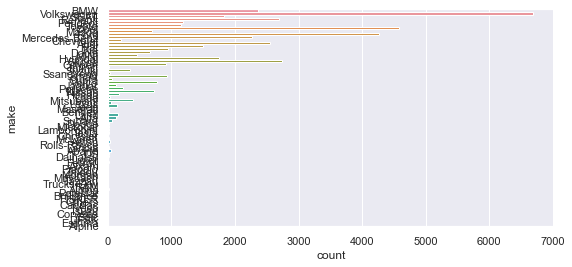

In [1168]:
# the manager requests a plot of the total number of cars according to the make
sns.countplot(y ='make', data= df)
sns.set(rc = {'figure.figsize':(26,10)})
plt.show()
# the make with the most cars for selling is Volkswagen
# From the one hand people tend to sell VW cars more frequently than other makes and is not a good sign
# especially for the used cars, as someone could think that a lot of people sell their VW cars as thez are not pleased
# from the other hand Volkswagen cars are very popular cars in Germany. 
# Actually, in 2021, the Volkswagen Golf, T-Roc, and Tiguan were the best-selling car models in Germany.
# So, it is logical that there are so many Volkswagen cars
# and we could say to the manager not to worry about the results of the plots

In [1169]:
# Creating a new dataframe only with VW cars
VW_df = df[(df.make == "Volkswagen")]
VW_df.iloc[2:7,1:3] # displaying from third to Seventh row, 2nd and 3rd column from the VW dataframe

,make,model
15,Volkswagen,Polo
21,Volkswagen,Golf
23,Volkswagen,Cross Touran
24,Volkswagen,Beetle
25,Volkswagen,Golf Cabriolet


In [1170]:
# getting the numerical features and describing the dataframe of VW cars
VW_df_num = VW_df.select_dtypes(include=['number'])
VW_df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
mileage,6693.0,81372.160616,65480.949733,1.0,26300.0,70000.0,118332.0,500000.0
price,6693.0,15962.334529,11943.602926,1396.0,7990.0,11497.0,20830.0,101880.0
hp,6693.0,124.096818,50.616792,60.0,90.0,116.0,150.0,476.0
age,6693.0,6.288062,3.048047,1.0,4.0,6.0,9.0,11.0


In [1171]:
# we could compare the VW measurements with the measurements of the whole dataframe
df_num.describe().T
# for instance we could say that the average price of the current dataframe is lower than the average price of the VW
# cars dataframe but the the average HP of the current dataframe is higher than the average HP of the VW cars.
# we could inform the manager about the elements we got.

,count,mean,std,min,25%,50%,75%,max
mileage,44107.0,72321.358152,62188.914475,0.0,21500.0,61260.0,106000.0,1111111.0
price,44107.0,16529.290589,19423.417574,1100.0,7490.0,10990.0,19490.0,1199900.0
hp,44107.0,133.514431,75.012750,1.0,86.0,116.0,150.0,850.0
age,44107.0,6.070170,3.119355,1.0,3.0,6.0,9.0,11.0


<AxesSubplot:xlabel='offer_type', ylabel='count'>

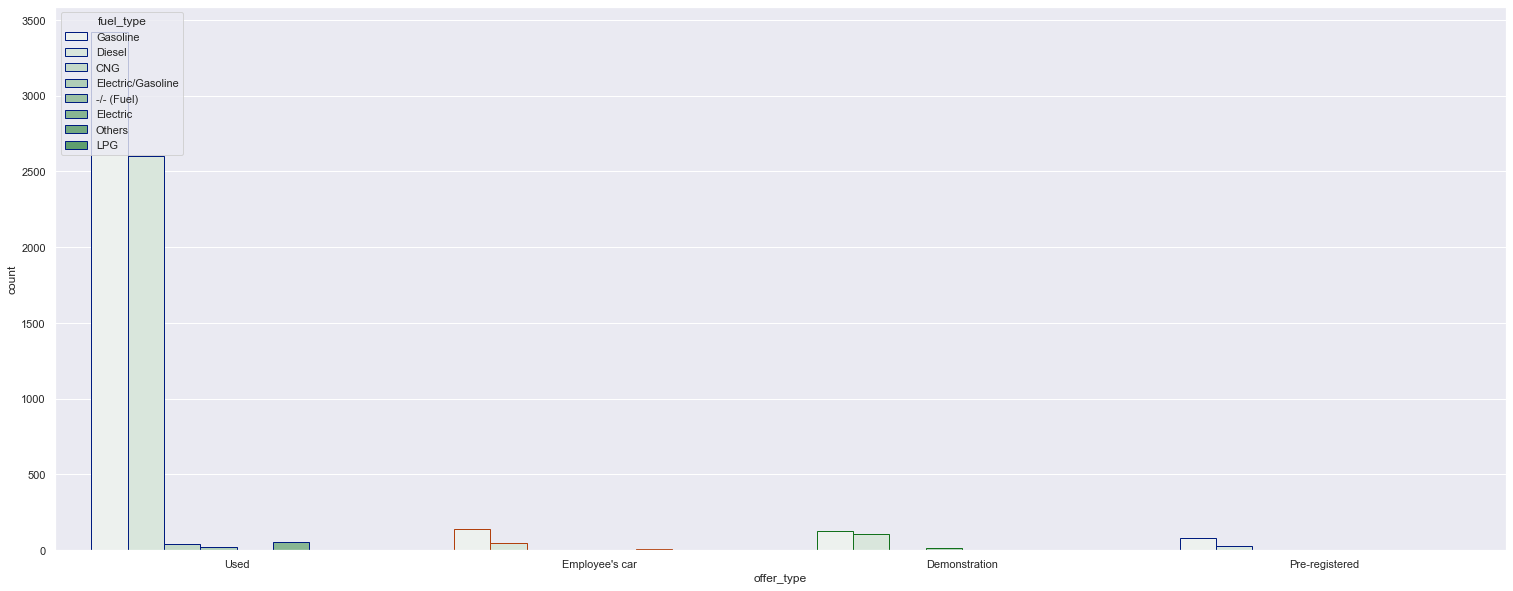

In [1172]:
# the manager requests a plot of the offer_type by the fuel_type to check trends in the fuel type offering
sns.countplot(x='offer_type', hue='fuel_type', color='g', edgecolor=sns.color_palette("dark", 3), data = VW_df)

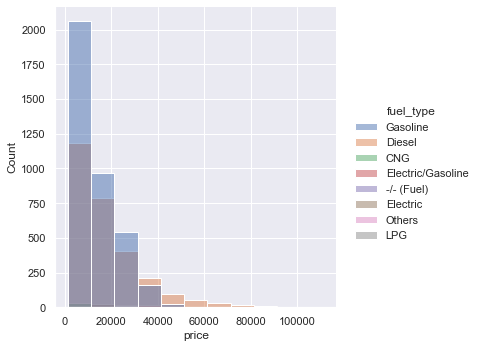

In [1173]:
# the manager requests a plot of price by the fuel_type rate to check trends in pricing based on fuel_type
sns.displot(data=VW_df, x="price", hue="fuel_type", binwidth=10000)

In [1174]:
# the manager requests cheap opportunities for the Volkswagen best seller cars: Golf, T-Roc, and Tiguan
VW_best_sellers = df[((df.model == "Golf") | (df.model == "T-Roc") | (df.model == "Tiguan")) & (df.price<8000)]
VW_best_sellers

,mileage,make,model,fuel_type,gearbox,offer_type,price,hp,year,age
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122,1970-01-01 00:00:00.000002011,11
11,84000,Volkswagen,Golf,Gasoline,Manual,Used,6990,105,1970-01-01 00:00:00.000002011,11
21,81970,Volkswagen,Golf,Gasoline,Manual,Used,7850,105,1970-01-01 00:00:00.000002012,10
214,132500,Volkswagen,Golf,Gasoline,Automatic,Used,7800,122,1970-01-01 00:00:00.000002011,11
224,87216,Volkswagen,Golf,Gasoline,Manual,Used,7970,122,1970-01-01 00:00:00.000002011,11
...,...,...,...,...,...,...,...,...,...,...
37605,179854,Volkswagen,Golf,Gasoline,Manual,Used,7390,140,1970-01-01 00:00:00.000002014,8
37748,100000,Volkswagen,Golf,Gasoline,Manual,Used,7999,86,1970-01-01 00:00:00.000002014,8
39417,245335,Volkswagen,Golf,Diesel,Automatic,Used,6990,150,1970-01-01 00:00:00.000002015,7
40511,191795,Volkswagen,Golf,Diesel,Manual,Used,7850,110,1970-01-01 00:00:00.000002016,6


In [1175]:
# and then the manager requests cheap opportunities for the Volkswagen best seller cars: Golf, T-Roc, and Tiguan with high hp
# and fuel type Diesel
VW_best_sellers_opportunities = df[((df.model == "Golf") | (df.model == "T-Roc") | (df.model == "Tiguan")) & (df.price<8000) & (df.hp>100) & (df.fuel_type== "Diesel")]
VW_best_sellers_opportunities

,mileage,make,model,fuel_type,gearbox,offer_type,price,hp,year,age
627,264038,Volkswagen,Golf,Diesel,Manual,Used,4490,105,1970-01-01 00:00:00.000002012,10
690,278000,Volkswagen,Golf,Diesel,Manual,Used,5990,105,1970-01-01 00:00:00.000002015,7
1060,218199,Volkswagen,Golf,Diesel,Manual,Used,4999,105,1970-01-01 00:00:00.000002012,10
1082,200000,Volkswagen,Golf,Diesel,Manual,Used,6200,105,1970-01-01 00:00:00.000002014,8
1225,173100,Volkswagen,Golf,Diesel,Manual,Used,6200,105,1970-01-01 00:00:00.000002011,11
...,...,...,...,...,...,...,...,...,...,...
37163,90391,Volkswagen,Golf,Diesel,Manual,Used,6980,105,1970-01-01 00:00:00.000002013,9
37247,180000,Volkswagen,Golf,Diesel,Manual,Used,7000,105,1970-01-01 00:00:00.000002013,9
39417,245335,Volkswagen,Golf,Diesel,Automatic,Used,6990,150,1970-01-01 00:00:00.000002015,7
40511,191795,Volkswagen,Golf,Diesel,Manual,Used,7850,110,1970-01-01 00:00:00.000002016,6


#### seperating continuous and discrete numeric variables

In [1176]:
# defining a function for seperating continuous and discrete numeric variables
# We use the random number 350 to filter each column and to compare the number of the unique values with the number 350
def variable(x):
    lst_cont=[]
    lst_disc=[]
    for i in x:
        if len(x[i].unique())>350:
            lst_cont.append(i)
        else:
            lst_disc.append(i)
    return x[lst_cont], x[lst_disc] 

In [1177]:
# seperating continuous, discrete 
continuous_df, discrete_df = variable(df_num)

In [1178]:
# continuous stored
continuous_df

,mileage,price
0,235000,6800
1,92800,6877
2,149300,6900
3,96200,6950
4,156000,6950
...,...,...
46394,10,12340
46396,99,12490
46397,550,12805
46398,837,12805


In [1179]:
# discrete stored
discrete_df

,hp,age
0,116,11
1,122,11
2,160,11
3,110,11
4,156,11
...,...,...
46394,72,1
46396,71,1
46397,69,1
46398,69,1


### numerical features' correlations

In [1180]:
# to hide the repeat half of the heatmap we use the following mask
mask = np.zeros_like(df_num.corr())
mask
mask[np.triu_indices_from(mask)] = True 
mask

array([[1., 1., 1., 1.],
       [0., 1., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

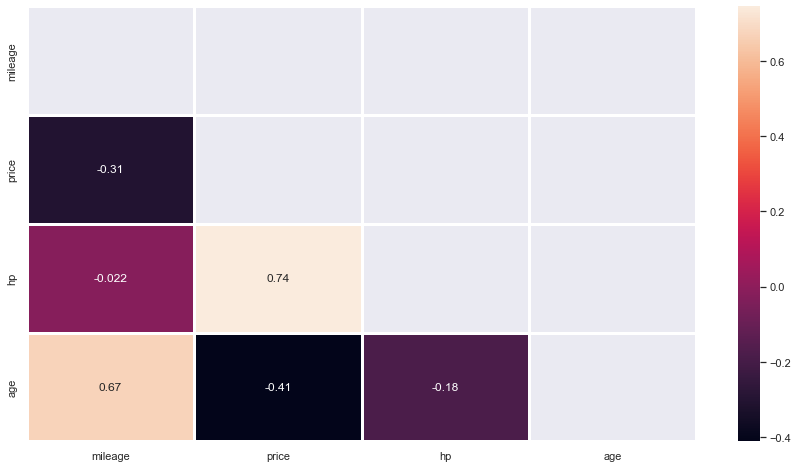

In [1181]:
# the correlations matrix from numerical columns
correlations_matrix = df_num.corr()
sns.heatmap(correlations_matrix,sns.set(rc = {'figure.figsize':(15,8)}), linecolor='white', linewidths=3, mask=mask, annot=True)
plt.show()
# There is no multicollinearity between the features (one-to-one) as there is no correlation greater than 0.85

#### column price will be our target 

In [1182]:
# checking the correlation for each numerical column with the column 'price'
for i in df_num:
    correlation_with_price = df_num[i].corr(df_num['price'])
    print(i,'has correlation with price: ', round(correlation_with_price ,2))
# sorting the correlations
df_num.corr()['price'].sort_values(ascending=False)
# the highest correlation is between hp and price
# There are various strength of correlation:
# if |correlation| < 0.3 -> very weak correlation (on table it is replaced by 0)
# if 0.3 <|correlation|< 0.5 -> weak correlation
# if 0.5 <|correlation|< 0.7 -> moderate correlation
# if |correlation|> 0.7 -> strong correlation
# where |correlation| is the Absolute value of the value

mileage has correlation with price:  -0.31
price has correlation with price:  1.0
hp has correlation with price:  0.74
age has correlation with price:  -0.41


price      1.000000
hp         0.744893
mileage   -0.305364
age       -0.411495
Name: price, dtype: float64

In [1183]:
# filtering the features that have strong correlation with the target 'price'
correlations_matrix = df_num.corr()
df_high_correlated = correlations_matrix[(correlations_matrix['price'] > .7) | (correlations_matrix['price'] < -.7)]['price']
df_high_correlated
# only the column hp is high correlated with the price 

price    1.000000
hp       0.744893
Name: price, dtype: float64

In [1184]:
# filtering the features that have very weak correlation with the target 'price'
correlations_matrix = df_num.corr()
df_low_correlated = correlations_matrix[((correlations_matrix['price'] < .3) & (correlations_matrix['price'] > -.3))]['price']
df_low_correlated
# there is no low correlated column with the price 

Series([], Name: price, dtype: float64)

### Build a Model (X-y split, train-test split)

#### column 'price' is the target variable

In [1185]:
# X-y split for the data
# X: independent variables or predictors
# Y: dependent variables or responses
y = df['price']
X = df.drop('price', axis=1)
print('X is:  \n', X, '\nand y is : ', y )

X is:  
        mileage        make   model          fuel_type gearbox      offer_type  \
0       235000         BMW     316             Diesel  Manual            Used   
1        92800  Volkswagen    Golf           Gasoline  Manual            Used   
2       149300        SEAT    Exeo           Gasoline  Manual            Used   
3        96200     Renault  Megane           Gasoline  Manual            Used   
4       156000     Peugeot     308           Gasoline  Manual            Used   
...        ...         ...     ...                ...     ...             ...   
46394       10     Citroen      C1           Gasoline  Manual  Pre-registered   
46396       99        Fiat     500  Electric/Gasoline  Manual  Pre-registered   
46397      550        Fiat     500  Electric/Gasoline  Manual   Demonstration   
46398      837        Fiat   Panda  Electric/Gasoline  Manual   Demonstration   
46399     1500       Skoda   Fabia           Gasoline  Manual   Demonstration   

        hp        

In [1186]:
# categorical features and numerical features will be treated differently.
# splitting every column except the target in numerical and categorical
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)
X_num

,mileage,hp,age
0,235000,116,11
1,92800,122,11
2,149300,160,11
3,96200,110,11
4,156000,156,11
...,...,...,...
46394,10,72,1
46396,99,71,1
46397,550,69,1
46398,837,69,1


In [1187]:
# # train-test splitting
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # getting the subset of the trained data from the numerical data
# X_train_num = X_train.select_dtypes(include='number')
# X_train_num

# # getting the subset of the trained data from the categorical data
# X_train_cat = X_train.select_dtypes(include = object)
# X_train_cat

# # Let's use One Hot/Label Encoding for the categorical features
# encoder_train = OneHotEncoder(drop='first').fit(X_train_cat)
# encoded_train = encoder_train.transform(X_train_cat).toarray()
# cols = encoder_train.get_feature_names(input_features=X_train_cat.columns)
# onehot_encoded_train = pd.DataFrame(encoded_train, columns=cols)
# onehot_encoded_train #.head()

# # concatenating DataFrames of the numerical trained subset and encoded (trained) categorical subset
# X_train_concat = pd.concat([X_train_num.reset_index(drop=True), onehot_encoded_train.reset_index(drop=True)], axis=1, ignore_index=True)
# # X_train_concat = pd.merge(X_train_num.reset_index(drop=True), onehot_encoded_train.reset_index(drop=True), right_index= True, left_index= True)
# X_train_concat

# # Apply linear regression to the trained data. Fit the model in Supervised learning. 
# # Assume a linear relationship between 𝑦 and 𝐱: 𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀
# model_train = LinearRegression()
# model_train.fit(X_train_concat, y_train)

# # shapes of the datasets
# print('X_train.shape is: ', X_train.shape)
# print('X_test.shape is: ', X_test.shape)
# print('y_train.shape is: ', y_train.shape)
# print('y_test.shape is: ', y_test.shape)

# # getting the subset of the test data from the numerical data
# X_test_num = X_test.select_dtypes(include='number')
# X_test_num

# # getting the subset of the test data from the categorical data
# X_test_cat = X_test.select_dtypes(include = object)
# X_test_cat


# Using One Hot/Label Encoding for the categorical features
# encoder_train = OneHotEncoder(drop='first').fit(X_train_cat)
# we use for the encoder_test the same dataset X_train_cat
# encoder_test = OneHotEncoder(drop='first').fit(X_train_cat)
# encoded_test = encoder_test.transform(X_test_cat).toarray()
# cols = encoder_test.get_feature_names(input_features=X_test_cat.columns)
# onehot_encoded_test = pd.DataFrame(encoded_test, columns=cols)
# onehot_encoded_test#.head()

# we get an error with the previous process
# Found unknown categories ['T4 Allstar', 'GS 250', 'B7', 'Cooper S Roadster', 'Q50', 'e', 'MP4-12C', 'Alpine A110',
# 'Cooper D Paceman', 'GranCabrio', 'XD3', 'Durango', '695', 'SLK 300', 'Rodius', 'Mirai', 'Transit Bus', 'Transporter',
# 'Roadster', 'CLS 63 AMG', 'Golf GTE', 'C6', '323', 'Romeo 4C', 'S 600', 'Gallardo', 'Urban Cruiser', 'Dart', 'MUSSO', 'Linea']
# in column 1 during transform
# that means that there are some categories that the model took in consideration in the fitting of X_train_cat subset but
# it does not take in consideration the same categories in the fitting of X_test_ categories.
# the solution is to fit the model from the beginning with the whole dataset of X_cat

In [1188]:
# # using One Hot/Label Encoding for the categorical features from the beginning with the whole dataset of X_cat
# encoder = OneHotEncoder(drop='first').fit(X_cat)
# encoded = encoder.transform(X_cat).toarray()
# cols = encoder.get_feature_names(input_features=X_cat.columns)
# onehot_encoded = pd.DataFrame(encoded, columns=cols)
# onehot_encoded#.head()
# or
# using dummies
df_dummies = pd.get_dummies(X_cat, drop_first = True)
df_dummies

,make_Aixam,make_Alfa,make_Alpina,make_Alpine,make_Aston,make_Audi,make_BMW,make_Baic,make_Bentley,make_Brilliance,...,fuel_type_Hydrogen,fuel_type_LPG,fuel_type_Others,gearbox_Manual,gearbox_Semi-automatic,gearbox_unknown,offer_type_Employee's car,offer_type_New,offer_type_Pre-registered,offer_type_Used
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
46396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
46397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
46398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [1189]:
# concatenating DataFrames X_num and df_dummies
final_df = pd.concat([X_num, df_dummies], axis=1)
final_df
# final_df = pd.concat([X_num.reset_index(drop=True),onehot_encoded.reset_index(drop=True)],axis=1, ignore_index=True)
# final_df

,mileage,hp,age,make_Aixam,make_Alfa,make_Alpina,make_Alpine,make_Aston,make_Audi,make_BMW,...,fuel_type_Hydrogen,fuel_type_LPG,fuel_type_Others,gearbox_Manual,gearbox_Semi-automatic,gearbox_unknown,offer_type_Employee's car,offer_type_New,offer_type_Pre-registered,offer_type_Used
0,235000,116,11,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,92800,122,11,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,149300,160,11,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,96200,110,11,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,156000,156,11,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46394,10,72,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
46396,99,71,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
46397,550,69,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
46398,837,69,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [1190]:
# independent variables or predictors
X_final = final_df
# dependent variables or responses
y_final = df['price']

In [1191]:
# new train-test splitting based on the new data
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, shuffle = True)

In [1192]:
# shapes of the datasets
print('X_train.shape is: ', X_train.shape)
print('X_test.shape is: ', X_test.shape)
print('y_train.shape is: ', y_train.shape)
print('y_test.shape is: ', y_test.shape)

X_train.shape is:  (35285, 931)
X_test.shape is:  (8822, 931)
y_train.shape is:  (35285,)
y_test.shape is:  (8822,)


In [1193]:
# using MinMaxScaler
scaler = MinMaxScaler()


In [1194]:
# scaled_X_train subset is
scaled_X_train = scaler.fit_transform(X_train)

In [1195]:
# and scaled_X_test is
scaled_X_test = scaler.transform(X_test)

In [1196]:
# creating a new model with linear regression 
# Apply linear regression. Fit the model in Supervised learning. 
# Assume a linear relationship between 𝑦 and 𝐱: 𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀
model2 = LinearRegression()
model2.fit(scaled_X_train, y_train)

LinearRegression()

In [1197]:
# model validation, R2 score
predictions2 = model2.predict(scaled_X_test)
model2.score(scaled_X_test, y_test)

-2.188703298964841e+21

In [1198]:
# creating a new model with linear regression 
# Apply linear regression. Fit the model in Supervised learning. 
# Assume a linear relationship between 𝑦 and 𝐱: 𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Model Validation

In [1199]:
# finding the R2 score - Coefficient of determination
# The coefficient of determination, denoted as 𝑅², tells us which amount of variation in 𝑦 can be explained
# by the dependence on 𝐱 using the particular regression model. 
# Larger 𝑅² indicates a better fit and means that the model can better explain the variation of the output with different inputs.
predictions = model.predict(X_test)
r2_score(y_test, predictions) # or model.score(X_test, y_test) An unbiased estimation of the predictive performance of your model is based on test data

0.8648961524524658

In [1200]:
# MSE (Mean Squared Error) represents the difference between the original and predicted values extracted
# by squared the average difference over the data set.
mean_squared_error(y_test, predictions, squared=False)

7269.192027166622

In [1201]:
# RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.
math.sqrt(mean_squared_error(y_test, predictions, squared=False))

85.25955680841076

In [1202]:
# MAE (Mean absolute error) represents the difference between the original and predicted values extracted 
# by averaged the absolute difference over the data set.
mean_absolute_error(y_test, predictions)

2881.77562004573

In [1203]:
# all of them
print('r2 score is: ', r2_score(y_test, predictions),', RMSE is: ', math.sqrt(mean_squared_error(y_test, predictions, squared=False)), ', MAE is: ', mean_absolute_error(y_test, predictions),'and MSE is: ', mean_squared_error(y_test, predictions, squared=False))

r2 score is:  0.8648961524524658 , RMSE is:  85.25955680841076 , MAE is:  2881.77562004573 and MSE is:  7269.192027166622


In [1204]:
# bias 𝑏₀
print('intercept:', model.intercept_)

intercept: 31049.692343976523


In [1205]:
# array containing 𝑏₁, 𝑏₂, ... respectively
print('slope:', model.coef_)

slope: [-4.65791486e-02  9.39941316e+01 -9.91189365e+02 -4.68407372e+03
 -3.81756364e+03  8.97308979e+02  9.45289337e+03  6.75218886e+04
  5.30674857e+03 -1.05485421e+04 -7.87499569e+03  8.86020040e+04
 -9.21795315e+03 -1.13504208e+04 -1.35602638e+04 -1.47710903e+04
 -1.37614767e+04  2.13647144e+04  1.97038072e+03 -8.76513997e+03
 -9.10803860e+03 -1.07626804e+04 -9.97020953e+03 -3.29601973e+03
 -6.01304153e+03  2.21621987e-04  2.75701261e+05  1.96917865e+03
 -1.11284519e+04 -1.30489003e+04 -1.34399445e+04 -1.56634884e+04
 -2.34220107e-05 -6.45406847e+03 -2.88329101e+03 -4.25568576e+03
 -1.33901709e+04 -1.46176204e+04  1.13053203e+05 -1.11743903e+04
  5.67633010e+03  1.69720299e+03 -5.05788238e+03 -1.32432108e+04
  3.11766244e+04  3.17417400e+05 -1.34609587e+04  8.37386031e+04
  1.01335734e+04 -6.70902673e+04 -1.09520419e+04  1.79369184e+04
 -1.32757536e+04 -1.39371572e+04 -1.66327118e-05 -1.38492059e+04
 -4.95766059e+03  2.91309043e+03  3.40576782e+04 -1.72152220e+03
 -1.35530899e+04  

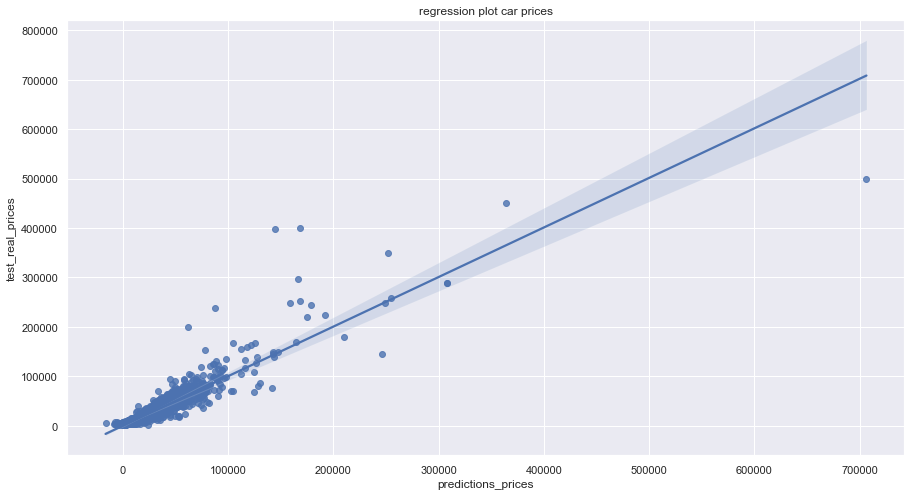

In [1206]:
# regression plot between predictions_prices and test_real_prices
sns.regplot(x=predictions, y=y_test)
plt.xlabel('predictions_prices')
plt.ylabel('test_real_prices')
plt.title('regression plot car prices');

#### We have a benchmark and we will try different approaches

In [1207]:
# When we retry the benchmark model, we get different r2 scores in a big range, these different r2 scores depend on
# the train and test set in test-train splitting and I believe that the reason of the big range are the outliers

### outliers on the target variable:

<AxesSubplot:xlabel='price', ylabel='Density'>

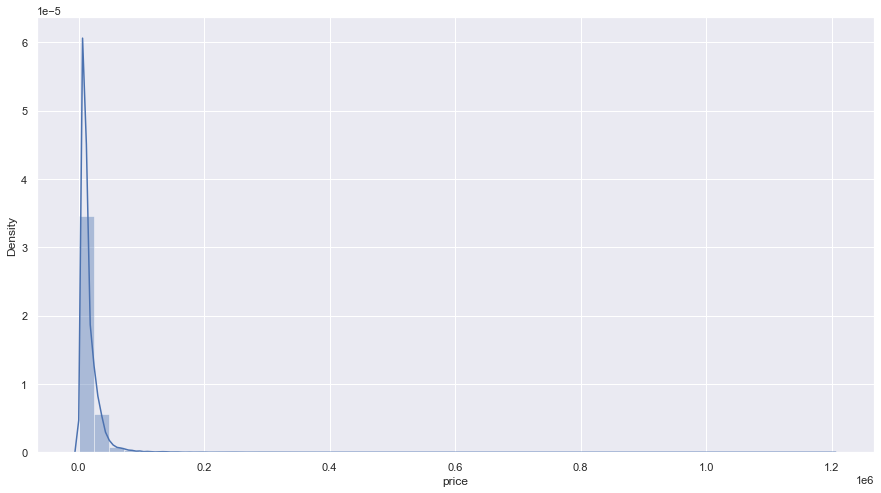

In [1208]:
# distribution plot of the target variable
sns.distplot(df['price'])
# it is skewed and there are outliers with really high price

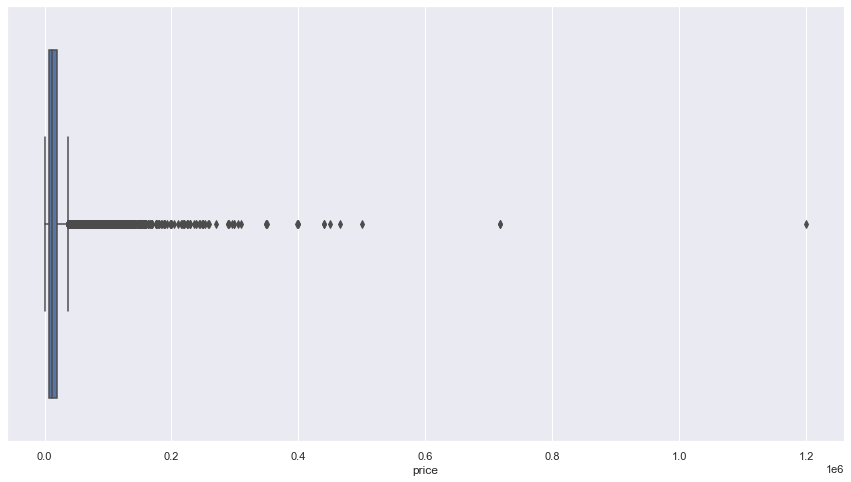

In [1209]:
# boxplot of the target variable
sns.boxplot(df['price'])
plt.show()
# we have a lot of outliers at high prices, especially between 75 percentile and the maximum price

In [1210]:
# finding the some percentiles to understand better the data 
quantile_75 = df['price'].quantile(0.75)
quantile_90 = df['price'].quantile(0.90)
quantile_95 = df['price'].quantile(0.95)
quantile_99 = df['price'].quantile(0.99)
print('the 75th percentile is: ', quantile_75,', the 90th percentile is: ', quantile_90,', the 95th percentile is: ', quantile_95,' and the 99th percentile is: ', quantile_99)
# there is a really huge range of prices and we can really understand the outliers when
# the 90th percentile is:  32490 , the 95th percentile is:  42450 and the 99th percentile is:  83417

the 75th percentile is:  19490.0 , the 90th percentile is:  32490.0 , the 95th percentile is:  42450.0  and the 99th percentile is:  83417.18000000104


In [1211]:
# let's filter the outliers by price, price < 42500 (95th percentile)
df_no_outliers = df[df['price'] < 42500]
df_no_outliers

,mileage,make,model,fuel_type,gearbox,offer_type,price,hp,year,age
0,235000,BMW,316,Diesel,Manual,Used,6800,116,1970-01-01 00:00:00.000002011,11
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122,1970-01-01 00:00:00.000002011,11
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160,1970-01-01 00:00:00.000002011,11
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110,1970-01-01 00:00:00.000002011,11
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156,1970-01-01 00:00:00.000002011,11
...,...,...,...,...,...,...,...,...,...,...
46394,10,Citroen,C1,Gasoline,Manual,Pre-registered,12340,72,1970-01-01 00:00:00.000002021,1
46396,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12490,71,1970-01-01 00:00:00.000002021,1
46397,550,Fiat,500,Electric/Gasoline,Manual,Demonstration,12805,69,1970-01-01 00:00:00.000002021,1
46398,837,Fiat,Panda,Electric/Gasoline,Manual,Demonstration,12805,69,1970-01-01 00:00:00.000002021,1


In [1212]:
difference = df.shape[0]-df_no_outliers.shape[0]
print('the shape of df is: ', df.shape,' and the difference between df and df_no_outliers (df without outliers) is: ', difference, 'observations')

the shape of df is:  (44107, 10)  and the difference between df and df_no_outliers (df without outliers) is:  2190 observations


In [1213]:
# sorting df_no_outliers correlations
df_no_outliers.corr()['price'].sort_values(ascending=False)
# df correlations are:
# price      1.000000
# hp         0.744893
# mileage   -0.305364
# age       -0.411495

price      1.000000
hp         0.675933
mileage   -0.420605
age       -0.623774
Name: price, dtype: float64

In [1214]:
# X-y split for the data
# X: independent variables or predictors
# Y: dependent variables or responses
y_no_outliers = df_no_outliers['price']
X_no_outliers = df_no_outliers.drop('price', axis=1)
print('X is:  \n', X_no_outliers, '\nand y is : ', y_no_outliers )

X is:  
        mileage        make   model          fuel_type gearbox      offer_type  \
0       235000         BMW     316             Diesel  Manual            Used   
1        92800  Volkswagen    Golf           Gasoline  Manual            Used   
2       149300        SEAT    Exeo           Gasoline  Manual            Used   
3        96200     Renault  Megane           Gasoline  Manual            Used   
4       156000     Peugeot     308           Gasoline  Manual            Used   
...        ...         ...     ...                ...     ...             ...   
46394       10     Citroen      C1           Gasoline  Manual  Pre-registered   
46396       99        Fiat     500  Electric/Gasoline  Manual  Pre-registered   
46397      550        Fiat     500  Electric/Gasoline  Manual   Demonstration   
46398      837        Fiat   Panda  Electric/Gasoline  Manual   Demonstration   
46399     1500       Skoda   Fabia           Gasoline  Manual   Demonstration   

        hp        

In [1215]:
# categorical features and numerical features will be treated differently.
# splitting every column except the target in numerical and categorical
X_num_no_outliers = X_no_outliers.select_dtypes(include = np.number)
X_cat_no_outliers = X_no_outliers.select_dtypes(include = object)
X_num_no_outliers

,mileage,hp,age
0,235000,116,11
1,92800,122,11
2,149300,160,11
3,96200,110,11
4,156000,156,11
...,...,...,...
46394,10,72,1
46396,99,71,1
46397,550,69,1
46398,837,69,1


In [1216]:
# using One Hot/Label Encoding for the categorical features from the dataset of X_cat_no_outliers
encoder_no_outliers = OneHotEncoder(drop='first').fit(X_cat_no_outliers)
encoded_no_outliers = encoder_no_outliers.transform(X_cat_no_outliers).toarray()
cols = encoder_no_outliers.get_feature_names(input_features=X_cat_no_outliers.columns)
onehot_encoded_no_outliers = pd.DataFrame(encoded_no_outliers, columns=cols)
onehot_encoded_no_outliers#.head()

,make_Aixam,make_Alfa,make_Alpina,make_Audi,make_BMW,make_Baic,make_Brilliance,make_Cadillac,make_Chevrolet,make_Chrysler,...,fuel_type_Hydrogen,fuel_type_LPG,fuel_type_Others,gearbox_Manual,gearbox_Semi-automatic,gearbox_unknown,offer_type_Employee's car,offer_type_New,offer_type_Pre-registered,offer_type_Used
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
41913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
41914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
41915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1217]:
final_df_no_outliers = pd.concat([X_num_no_outliers.reset_index(drop=True),onehot_encoded_no_outliers.reset_index(drop=True)],axis=1, ignore_index=True)
final_df_no_outliers

,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,784,785
0,235000,116,11,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,92800,122,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,149300,160,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,96200,110,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,156000,156,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41912,10,72,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
41913,99,71,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
41914,550,69,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
41915,837,69,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1218]:
X_final_no_outliers = final_df_no_outliers
y_final_no_outliers = df_no_outliers['price']

In [1219]:
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_final_no_outliers, y_final_no_outliers, test_size=0.2, random_state=42, shuffle = True)

In [1220]:
# shapes of the datasets
print('X_train_no_outliers.shape is: ', X_train_no_outliers.shape)
print('X_test_no_outliers.shape is: ', X_test_no_outliers.shape)
print('y_train_no_outliers.shape is: ', y_train_no_outliers.shape)
print('y_test_no_outliers.shape is: ', y_test_no_outliers.shape)

X_train_no_outliers.shape is:  (33533, 786)
X_test_no_outliers.shape is:  (8384, 786)
y_train_no_outliers.shape is:  (33533,)
y_test_no_outliers.shape is:  (8384,)


In [1221]:
# creating a new model with linear regression 
# Apply linear regression. Fit the model in Supervised learning. 
# Assume a linear relationship between 𝑦 and 𝐱: 𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀
model_no_outliers = LinearRegression()
model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

LinearRegression()

In [1222]:
# finding the R2 score - Coefficient of determination
# The coefficient of determination, denoted as 𝑅², tells us which amount of variation in 𝑦 can be explained
# by the dependence on 𝐱 using the particular regression model. 
# Larger 𝑅² indicates a better fit and means that the model can better explain the variation of the output with different inputs.
predictions_no_outliers = model_no_outliers.predict(X_test_no_outliers)
r2_score_no_outliers = r2_score(y_test_no_outliers, predictions_no_outliers) # or model_no_outliers.score(X_test, y_test) An unbiased estimation of the predictive performance of your model is based on test data
r2_score_no_outliers
# much better r2_score

0.907986351257927

In [1223]:
# MSE (Mean Squared Error) represents the difference between the original and predicted values extracted
# by squared the average difference over the data set.
mean_squared_error(y_test_no_outliers, predictions_no_outliers, squared=False)

2614.007285188431

In [1224]:
# RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.
math.sqrt(mean_squared_error(y_test_no_outliers, predictions_no_outliers, squared=False))

51.12736337019963

In [1225]:
# MAE (Mean absolute error) represents the difference between the original and predicted values extracted 
# by averaged the absolute difference over the data set.
mean_absolute_error(y_test_no_outliers, predictions_no_outliers)

1907.0872586297828

In [1226]:
# all of them
print('r2 score_no_outliers is: ', r2_score(y_test_no_outliers, predictions_no_outliers),', RMSE_no_outliers is: ', math.sqrt(mean_squared_error(y_test_no_outliers, predictions_no_outliers, squared=False)), ', MAE_no_outliers is: ', mean_absolute_error(y_test_no_outliers, predictions_no_outliers),'and MSE_no_outliers is: ', mean_squared_error(y_test_no_outliers, predictions_no_outliers, squared=False))

r2 score_no_outliers is:  0.907986351257927 , RMSE_no_outliers is:  51.12736337019963 , MAE_no_outliers is:  1907.0872586297828 and MSE_no_outliers is:  2614.007285188431


In [1227]:
# bias 𝑏₀
print('intercept_no_outliers:', model_no_outliers.intercept_)

intercept_no_outliers: 19451.29258197159


In [1228]:
# array containing 𝑏₁, 𝑏₂, ... respectively
print('slope_no_outliers:', model_no_outliers.coef_)

slope_no_outliers: [-3.96138785e-02  6.18231988e+01 -9.38712102e+02 -9.93420746e+02
  6.90598290e+02  3.71661743e+03  3.71713554e+03  1.73634010e+03
 -1.89525516e+03 -3.53289456e+03  1.02623305e+03 -3.64352006e+03
 -5.48182798e+03 -2.50024119e+03 -1.19064609e+03 -2.96895311e+03
  9.45499278e+02 -1.66944843e+03 -1.56516883e+03 -2.54712869e+03
 -1.85257440e+03 -2.38634123e+03 -2.58436872e+02 -1.47019060e+03
 -1.44770339e+03 -3.15587676e+03  7.04206258e+02  2.25725385e+03
  4.43615586e+03  2.56708144e+03 -1.42202690e+03 -4.86217842e+03
 -3.28870047e+03  6.95673761e+03  2.35525191e+03 -8.75130842e+02
 -8.50250713e+02  4.31646173e+03 -1.02458445e+03  4.23524603e+03
 -2.03424813e+03 -2.03509095e+03 -1.10297483e+03 -1.84381218e+03
 -5.26102749e+03 -4.15812035e+03 -1.79561263e+03  9.91866155e+03
  1.45823511e+03 -2.62125222e+03 -3.91546629e+03 -7.10673084e+02
 -2.83202275e+03 -1.14398824e+03 -3.44985449e+03 -8.02358549e+02
  2.02808266e+03 -4.68110572e+01 -4.51940309e-07  3.05128829e+03
  2.43

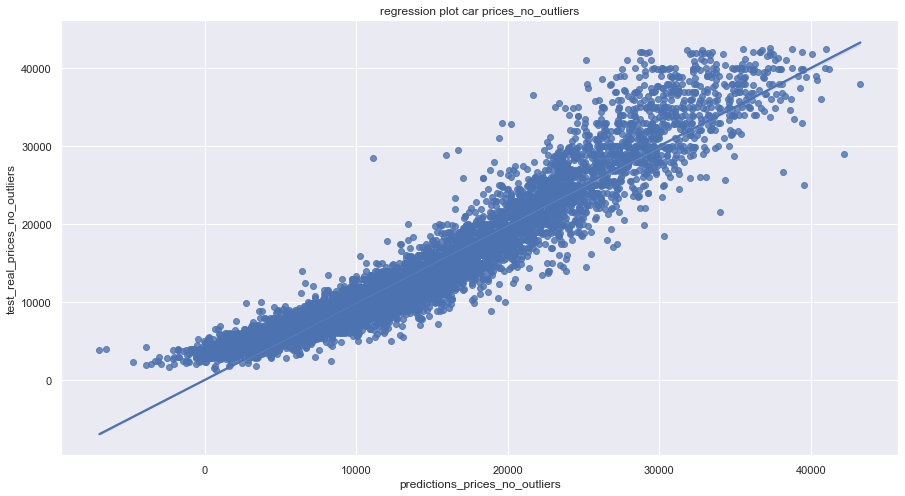

In [1229]:
# regression plot between predictions_prices and test_real_prices
sns.regplot(x=predictions_no_outliers, y=y_test_no_outliers)
plt.xlabel('predictions_prices_no_outliers')
plt.ylabel('test_real_prices_no_outliers')
plt.title('regression plot car prices_no_outliers');

#### using KNN-K Nearest Neighbors

In [1230]:
# # checking which k is the best
# r2_val=[]
# rmse_val = [] 
# mse_val = []
# mae_val = []

# for K in range(20):
#     K = K+1
#     model = neighbors.KNeighborsRegressor(n_neighbors = K)

#     model.fit(X_concat_train_st, y_train)  #fit the model
#     pred=model.predict(X_concat_test_st) #make prediction on test set
#    # error = math.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
#      #store rmse values
    
#     r2_k=r2_score(y_test, pred)
#     rmse_k=mean_squared_error(y_test, pred, squared=False)
#     mse_k=mean_squared_error(y_test, pred)
#     mae_k=mean_absolute_error(y_test, pred)
    
#     r2_val.append(r2_k)
#     rmse_val.append(rmse_k)
#     mse_val.append(mse_k)
#     mae_val.append(mae_k)
#     print('r2 value for  k = ' , K , 'is:', r2_k)
#     print('RMSE value for k = ' , K , 'is:', rmse_k)
#     print('MSE value for k = ' , K , 'is:', mse_k)
#     print('MAE value for k = ' , K , 'is:', mae_k)
#     print('\n')

In [1231]:
# for k=3 the r2 value is bigger than the rest of ks', however the r2 score for k=3 is 0.7567616708475113,
# less than the r2 score with scaling in linear regression

In [1232]:
# # KNN regressor will take the distances from the k=3 nearest neightbors and "average" them for the prediction.
# model_k3 = neighbors.KNeighborsRegressor(n_neighbors = 3)
# model_k3.fit(X_concat_train_st, y_train)  
# pred_k3=model_k3.predict(X_concat_test_st)

In [1233]:
# # regression plot between Predicted_prices-Real_prices using KNN-K Nearest Neighbors
# sns.regplot(x=pred_k3, y=y_test)
# plt.xlabel('Predicted_prices')
# plt.ylabel('Real_prices')
# plt.title('Regression plot to predict house prices-KNN');

In [1234]:
# transforming the price to log(price)
# df['price'] = df['price'].map(lambda p: np.log(p))

